## 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara <br>bisnis untuk digunakan sebagai fitur clustering. Lakukan <br>feature engineering! (20 poin)

Langkah-langkah:
<br>a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur
clustering. Tulis alasan teman-teman memilih fitur tersebut.
<br>b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).
Untuk mempermudah kamu, yuk lihat resource di bawah ini:

- Topic Machine Learning Preparation - Feature Engineering

## A. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

Untuk memilih fitur kita akan menggunakan RFM (Recency, Frequency, Monetary) sebagai fitur clustering. RFM adalah metode yang umum digunakan dalam analisis pelanggan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. Diharapkan dengan menggunakan RFM, kita dapat mengidentifikasi segmen pelanggan yang berbeda dan memahami perilaku mereka dengan lebih baik.

<!-- Code Description
- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members -->

Dari data yang ada, kita akan memilih fitur-fitur berikut sesuai dengan RFM :
1. **Recency (LAST_TO_END)**: Mengukur seberapa baru pelanggan melakukan pembelian terakhir. Fitur ini penting karena pelanggan yang baru saja bertransaksi cenderung lebih berharga.
2. **Frequency (FLIGHT_COUNT)**: Mengukur seberapa sering pelanggan melakukan pembelian. Pelanggan yang sering bertransaksi biasanya lebih loyal dan berpotensi untuk menghasilkan pendapatan yang lebih tinggi.
3. **Monetary (SUM_YR_1)**: Mengukur total nilai pembelian yang dilakukan oleh pelanggan. Fitur ini penting untuk mengidentifikasi pelanggan yang memberikan kontribusi terbesar terhadap pendapatan perusahaan.

Diharapkan dengan menggunakan ketiga fitur ini, kita dapat mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dan mengidentifikasi segmen-segmen yang berbeda. Hal ini akan membantu dalam pengambilan keputusan bisnis, seperti penargetan pemasaran yang lebih efektif dan peningkatan layanan pelanggan. Adapun cluster yang diharapkan adalah:

- **High Value Customers**: Pelanggan yang baru saja bertransaksi, sering bertransaksi, dan memberikan kontribusi pendapatan yang tinggi.
- **Loyal Customers**: Pelanggan yang sering bertransaksi tetapi mungkin tidak memberikan kontribusi pendapatan yang tinggi.
- **At Risk Customers**: Pelanggan yang baru saja bertransaksi tetapi jarang bertransaksi sebelumnya, sehingga berisiko kehilangan mereka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'flight_cleaned.csv')

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58255 entries, 0 to 58254
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   57860 non-null  object 
 16  LAST_TO_END        582

In [5]:
# feature selection berdasarkan RFM
df = df[['FLIGHT_COUNT', 'SUM_YR_1', 'LAST_TO_END']]
df.isnull().sum()


FLIGHT_COUNT    0
SUM_YR_1        0
LAST_TO_END     0
dtype: int64

In [6]:
df.head()

,FLIGHT_COUNT,SUM_YR_1,LAST_TO_END
0,210,239560.0,1
1,135,163618.0,11
2,23,116350.0,97
3,152,124560.0,5
4,92,112364.0,79


In [13]:
df.describe()

,FLIGHT_COUNT,SUM_YR_1,LAST_TO_END
count,58255.000000,58255.000000,58255.000000
mean,12.067634,5366.827963,171.255309
std,14.236472,8103.595049,180.560120
min,2.000000,0.000000,1.000000
25%,3.000000,1016.000000,28.000000
50%,7.000000,2808.000000,104.000000
75%,15.000000,6591.500000,258.000000
max,213.000000,239560.000000,731.000000


In [16]:
# save df mentah
df.to_csv(r'flight_cleaned_rfm_beforescaling_and_outlierstill.csv', index=False)

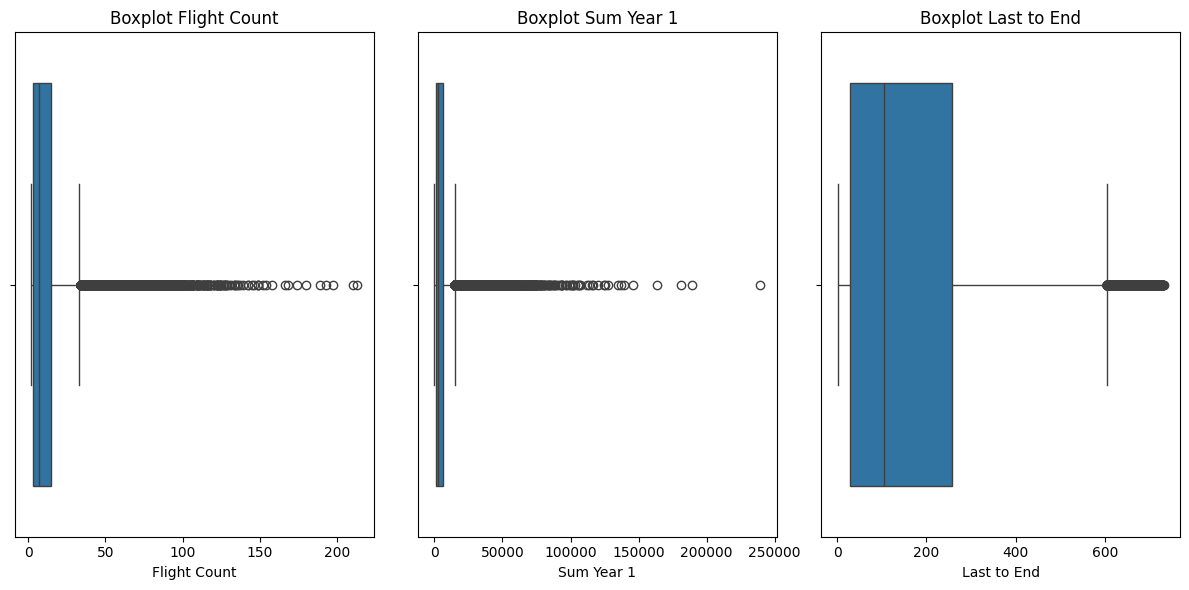

In [15]:


#buat boxplot untuk # fitur 'FLIGHT_COUNT', 'SUM_YR_1', dan 'LAST_TO_END' contohnya seperti dibawah
#boxplot untuk fitur monthlycharges dan total charges
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
# plt.title('Boxplot Monthly Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Monthly Charges')
# plt.subplot(1, 2, 2)
# sns.boxplot(x='Churn', y='TotalCharges', data=df)
# plt.title('Boxplot Total Charges by Churn')
# plt.xlabel('Churn')
# plt.ylabel('Total Charges')
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='FLIGHT_COUNT', data=df)
plt.title('Boxplot Flight Count')
plt.xlabel('Flight Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1', data=df)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='LAST_TO_END', data=df)
plt.title('Boxplot Last to End')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()

In [17]:
# transformasi LOG1P untuk mengurangi skewness untuk ketiga fitur
df['FLIGHT_COUNT_Log'] = np.log1p(df['FLIGHT_COUNT'])
df['SUM_YR_1_Log'] = np.log1p(df['SUM_YR_1'])
df['LAST_TO_END_Log'] = np.log1p(df['LAST_TO_END'])


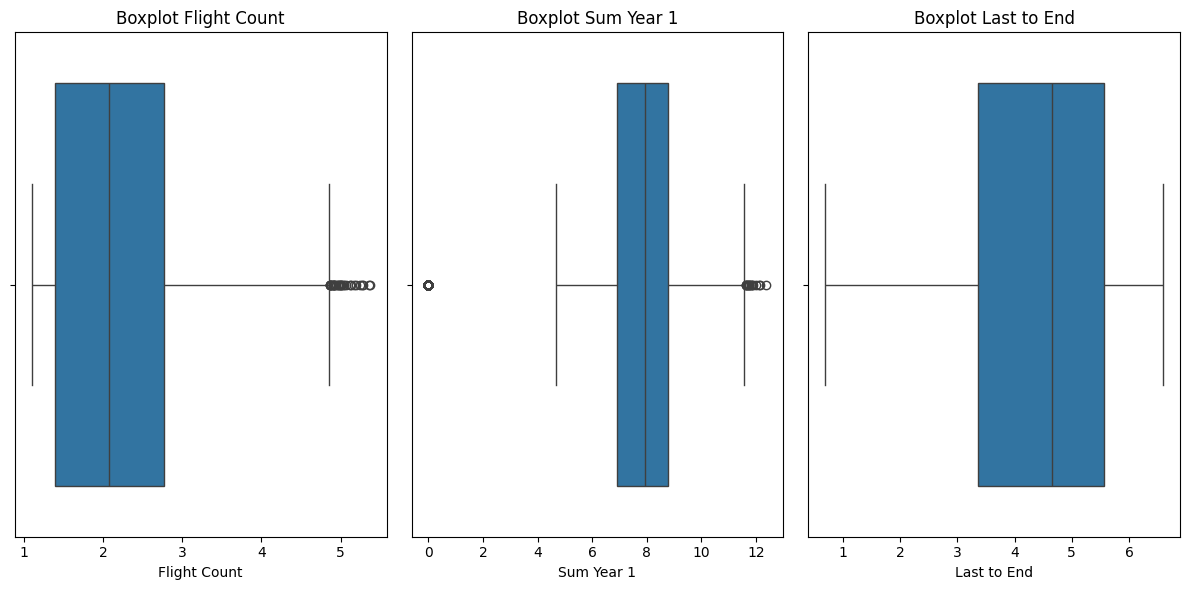

In [18]:
# boxplot setelah transformasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='FLIGHT_COUNT_Log', data=df)
plt.title('Boxplot Flight Count')
plt.xlabel('Flight Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1_Log', data=df)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='LAST_TO_END_Log', data=df)
plt.title('Boxplot Last to End')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()


In [23]:
df.head()

,FLIGHT_COUNT,SUM_YR_1,LAST_TO_END,FLIGHT_COUNT_Log,SUM_YR_1_Log,LAST_TO_END_Log,FLIGHT_COUNT_Log_Z,SUM_YR_1_Log_Z,LAST_TO_END_Log_Z
0,210,239560.0,1,5.351858,12.386563,0.693147,3.796129,1.742657,2.516008
1,135,163618.0,11,4.912655,12.005296,2.484907,3.269777,1.620897,1.293592
2,23,116350.0,97,3.178054,11.664367,4.584967,1.190989,1.512019,0.139160
3,152,124560.0,5,5.030438,11.732551,1.791759,3.410931,1.533794,1.766487
4,92,112364.0,79,4.532599,11.629508,4.382027,2.814310,1.500886,0.000705


In [19]:
# gunakan zscore untuk membuang outlier
from scipy import stats
df['FLIGHT_COUNT_Log_Z'] = np.abs(stats.zscore(df['FLIGHT_COUNT_Log']))
df['SUM_YR_1_Log_Z'] = np.abs(stats.zscore(df['SUM_YR_1_Log']))
df['LAST_TO_END_Log_Z'] = np.abs(stats.zscore(df['LAST_TO_END_Log']))
# filter outlier dengan threshold zscore 3
threshold = 3
df_filtered = df[(df['FLIGHT_COUNT_Log_Z'] < threshold) & 
                 (df['SUM_YR_1_Log_Z'] < threshold) & 
                 (df['LAST_TO_END_Log_Z'] < threshold)]


In [22]:
df_filtered

,FLIGHT_COUNT,SUM_YR_1,LAST_TO_END,FLIGHT_COUNT_Log,SUM_YR_1_Log,LAST_TO_END_Log,FLIGHT_COUNT_Log_Z,SUM_YR_1_Log_Z,LAST_TO_END_Log_Z
2,23,116350.0,97,3.178054,11.664367,4.584967,1.190989,1.512019,0.139160
4,92,112364.0,79,4.532599,11.629508,4.382027,2.814310,1.500886,0.000705
5,101,120500.0,1,4.624973,11.699413,0.693147,2.925012,1.523211,2.516008
6,73,82440.0,3,4.304065,11.319838,1.386294,2.540428,1.401992,2.043113
7,64,85258.0,15,4.174387,11.353449,2.772589,2.385019,1.412725,1.097323
...,...,...,...,...,...,...,...,...,...
58250,2,0.0,437,1.098612,0.000000,6.082219,1.301064,2.213068,1.160650
58251,2,0.0,297,1.098612,0.000000,5.697093,1.301064,2.213068,0.897901
58252,4,0.0,89,1.609438,0.000000,4.499810,0.688879,2.213068,0.081062
58253,2,0.0,29,1.098612,0.000000,3.401197,1.301064,2.213068,0.668459


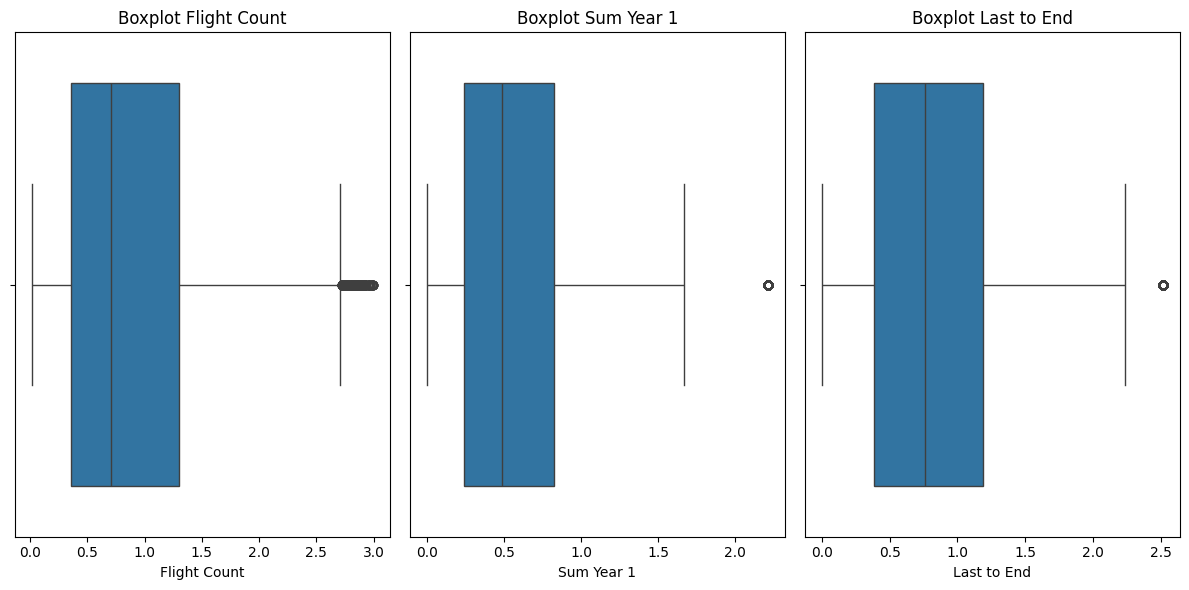

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='FLIGHT_COUNT_Log_Z', data=df_filtered)
plt.title('Boxplot Flight Count')
plt.xlabel('Flight Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='SUM_YR_1_Log_Z', data=df_filtered)
plt.title('Boxplot Sum Year 1')
plt.xlabel('Sum Year 1')
plt.subplot(1, 3, 3)
sns.boxplot(x='LAST_TO_END_Log_Z', data=df_filtered)
plt.title('Boxplot Last to End')
plt.xlabel('Last to End')
plt.tight_layout()
plt.show()

In [24]:
# drop fitur original sisakan fitur yang sudah dibersihkan dari outlier menggunakan zscore
df_filtered = df_filtered.drop(columns=['FLIGHT_COUNT', 'SUM_YR_1', 'LAST_TO_END', 'FLIGHT_COUNT_Log', 'SUM_YR_1_Log', 'LAST_TO_END_Log'])

In [25]:
df_filtered.head()

,FLIGHT_COUNT_Log_Z,SUM_YR_1_Log_Z,LAST_TO_END_Log_Z
2,1.190989,1.512019,0.139160
4,2.814310,1.500886,0.000705
5,2.925012,1.523211,2.516008
6,2.540428,1.401992,2.043113
7,2.385019,1.412725,1.097323


In [26]:
# save df yang sudah dibersihkan dari outlier
df_filtered.to_csv(r'flight_cleaned_rfm_outlierremoved.csv', index=False)

In [27]:
# scaling dengan menggunakan standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[['FLIGHT_COUNT_Log_Z', 'SUM_YR_1_Log_Z', 'LAST_TO_END_Log_Z']] = scaler.fit_transform(
    df_filtered[['FLIGHT_COUNT_Log_Z', 'SUM_YR_1_Log_Z', 'LAST_TO_END_Log_Z']])
# save df yang sudah di scaling


In [28]:
df_scaled.to_csv(r'flight_cleaned_rfm_after_scaling.csv', index=False)